In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries

In [3]:
#Getting Data Analyst and Data Scientist jobs in the AANZFTA Countries
df_DA_AANZFTA = df[(df['job_title_short'].isin(['Data Analyst'])) & (df['job_country'].isin(aanzfta_countries))].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_AANZFTA  = df_DA_AANZFTA.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_AANZFTA = df_DA_AANZFTA.explode('job_skills')

df_DA_AANZFTA['job_skills']

3457       python
3457          sql
3457        numpy
3457       pandas
3457         zoom
           ...   
778277     python
778277        sql
778277    tableau
778805        sql
778805      excel
Name: job_skills, Length: 438, dtype: object

In [15]:
df_DA_AANZFTA_group = df_DA_AANZFTA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_AANZFTA_top_pay = df_DA_AANZFTA_group.sort_values(by='median', ascending=False).head(10)

df_DA_AANZFTA_skills = df_DA_AANZFTA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

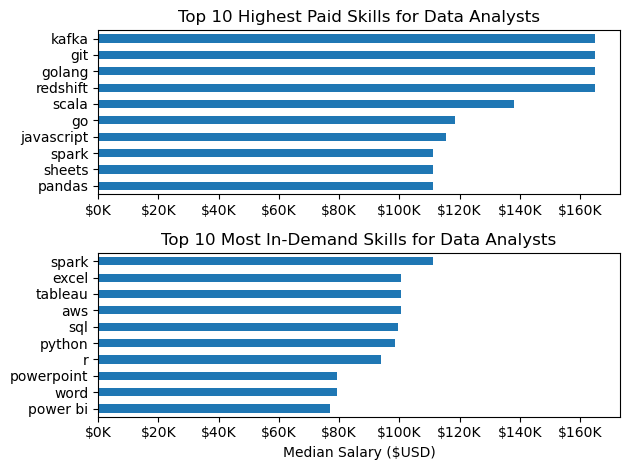

In [17]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_AANZFTA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_AANZFTA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()